In [1]:
import json
import pandas as pd

# Open the JSON file
with open('/Users/theolacroix/Desktop/MA2 EPFL deep learning/PROJET/data/sarcasm_data.json', 'r') as file:
    # Load JSON data from the file
    json_data = json.load(file)

# Define a list of labels (columns) you want to extract
labels = ['utterance', 'speaker', 'context', 'context_speakers', 'show', 'sarcasm']

# Create an empty DataFrame
df = pd.DataFrame(columns=labels)

# Iterate over each key-value pair in the JSON data
for key, value in json_data.items():
    # Extract only the desired labels from the JSON data and add a new row to the DataFrame
    row_data = {label: value[label] for label in labels}
    df.loc[len(df)] = row_data

# Now 'df' is a DataFrame with the desired columns
print(df.show.unique())

['BBT' 'FRIENDS' 'GOLDENGIRLS' 'SARCASMOHOLICS']


Keys in the HDF5 file: ['1_10004', '1_10009', '1_1001', '1_1003', '1_10190', '1_10462', '1_10495', '1_10496', '1_105', '1_10748', '1_10797', '1_10810', '1_10829', '1_10849', '1_10853', '1_10857', '1_10859', '1_10890', '1_10977', '1_11006', '1_11021', '1_11042', '1_11046', '1_11051', '1_11055', '1_11098', '1_11120', '1_11177', '1_11201', '1_11224', '1_11232', '1_11236', '1_11242', '1_11243', '1_11253', '1_11257', '1_11306', '1_11322', '1_11378', '1_11439', '1_1144', '1_11485', '1_11526', '1_11529', '1_11609', '1_11697', '1_11699', '1_11723', '1_11736', '1_11773', '1_1180', '1_1185', '1_11885', '1_11889', '1_1189', '1_11901', '1_11913', '1_11924', '1_11928', '1_12002', '1_12083', '1_12202', '1_12275', '1_12320', '1_12331', '1_1262', '1_1296', '1_1466', '1_1470', '1_1478', '1_1484', '1_1549', '1_1560', '1_162', '1_1627', '1_1638', '1_1666', '1_1678', '1_1722', '1_1732', '1_175', '1_1772', '1_1798', '1_1803', '1_182', '1_1931', '1_1973', '1_1987', '1_2075', '1_2119', '1_213', '1_2198', '1_

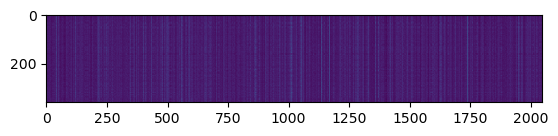

In [5]:
import h5py
import matplotlib.pyplot as plt

# Open the HDF5 file in read mode
with h5py.File('/Users/theolacroix/Desktop/MA2 EPFL deep learning/PROJET/data/resnet_pool5.hdf5', 'r') as file:
    # Print the keys at the root level of the HDF5 file
    print("Keys in the HDF5 file:", list(file.keys())) 
    print(len(file.keys()))
    dataset = file['1_1001']
    print(dataset.shape)
    
    # Load data from the dataset into a variable
    data = dataset[()]  # This will load the entire dataset into a numpy array

    # Now you can work with the loaded data
    print("Loaded data:", data)
    plt.imshow(dataset)

In [17]:
hf = h5py.File('/Users/theolacroix/Desktop/MA2 EPFL deep learning/PROJET/data/resnet_pool5.hdf5', 'r')
hf.keys()
data = hf.get('dataset').value
data

AttributeError: 'NoneType' object has no attribute 'value'

In [9]:
import numpy as np
np.array(dataset)



/var/folders/6f/ytt59zx56yd5zgv0p2r1vr740000gn/T/ipykernel_15329/3170837721.py:2: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  np.array(dataset)


ValueError: Not a dataset (not a dataset)

In [4]:
import h5py
import numpy as np
import os
from PIL import Image
save_path = '/Users/theolacroix/Desktop/MA2 EPFL deep learning/PROJET/data/resnet_pool5.hdf5'
img_path = '/Users/theolacroix/Desktop/MA2 EPFL deep learning/PROJET/data/1.jpeg'
print('image size: %d bytes'%os.path.getsize(img_path))
hf = h5py.File(save_path, 'a') # open a hdf5 file
img_np = np.array(Image.open(img_path))

dset = hf.create_dataset('default', data=img_np)  # write the data to hdf5 file
hf.close()  # close the hdf5 file
print('hdf5 file size: %d bytes'%os.path.getsize(save_path))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/theolacroix/Desktop/MA2 EPFL deep learning/PROJET/data/1.jpeg'